# PROJECT CHURN

This project is regarding Customer Churn Prediction. If we can know what all customers are going to churn out we can give thme offers or hear them inorder to retain them. In current business scenerio, It is very difficult and expensive to develop new customers as comapred to retaining our old customers


In [1]:
#Lets Load Important Libraries

import os
import pandas as pd
import numpy as np
import matplotlib as mlt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Lets Read the Data and do Basic Pre-processing.


In [2]:
#Lets Set working directory

os.chdir("F:/Data Scientist/Project_Churn")
os.getcwd()

'F:\\Data Scientist\\Project_Churn'

In [5]:
#Lets import data

#Train Data
Train=pd.read_csv("Train_data.csv")

#Test Data
Test=pd.read_csv("Test_data.csv")

In [6]:
#Lets check the data

Train.head(10)
Test.head(10)
len(Train)
len(Test)

1667

In [7]:
#Lets check summary of the data

Train.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
#Now lets check DATA TYPES of variables inorder to convert them in proper format

Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                            3333 non-null object
account length                   3333 non-null int64
area code                        3333 non-null int64
phone number                     3333 non-null object
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total day charge                 3333 non-null float64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3333 non-null float64
total night minutes              3333 non-null float64
total night calls                3333 non-null int64
total night charge               3333 non-null float64
total intl minutes           

In [9]:
Test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 21 columns):
state                            1667 non-null object
account length                   1667 non-null int64
area code                        1667 non-null int64
phone number                     1667 non-null object
international plan               1667 non-null object
voice mail plan                  1667 non-null object
number vmail messages            1667 non-null int64
total day minutes                1667 non-null float64
total day calls                  1667 non-null int64
total day charge                 1667 non-null float64
total eve minutes                1667 non-null float64
total eve calls                  1667 non-null int64
total eve charge                 1667 non-null float64
total night minutes              1667 non-null float64
total night calls                1667 non-null int64
total night charge               1667 non-null float64
total intl minutes           

In [10]:
#Lets change the area.code type to categorical

Train['area code']=Train['area code'].astype('object')
Test['area code']=Test['area code'].astype('object')


In [11]:
#Drop Variable Phone Number
Train=Train.drop('phone number',axis=1)
Test=Test.drop('phone number',axis=1)


In [12]:
#Lets seperate Continuous Variables
num_variable=Train.columns[(Train.dtypes=='float64')|(Train.dtypes=='int64')].tolist()

#Seperate Categorical Data wihtout Target Variable
cat_variable=Train.columns[Train.dtypes=='object'].tolist()
cat_variable.remove('Churn')
cat_variable

['state', 'area code', 'international plan', 'voice mail plan']

In [13]:
num_variable

['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'number customer service calls']

In [14]:
#For Test Variable
num_variable01=Test.columns[(Test.dtypes=='float64')|(Test.dtypes=='int64')].tolist()


In [15]:
num_variable01

['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'number customer service calls']

In [16]:

#Now seperate categorical data
cat_variable01=Test.columns[Test.dtypes=='object'].tolist()
cat_variable01.remove('Churn')
cat_variable01

['state', 'area code', 'international plan', 'voice mail plan']

# Now we will go for Advanced Pre-processing.

# MISSING VALUE ANALYSIS

In [17]:
#Lets check if there are any missing values in our Data
(Train.isnull().sum())


state                            0
account length                   0
area code                        0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

#Check missing values in Test Data

Test.isnull().sum()

#As observed there are no missing values present in our data.

# OUTLIERS ANALYSIS

In [18]:
#Lets load important libraries
#For plotting graphs
import matplotlib.pyplot as plt
import random


In [19]:
#Treating Outliers
#For Train Data
#for i in num_variable:
 #       print(i)
  #      q75, q25 = np.percentile(Train.loc[:,i], [75 ,25])
   #     iqr = q75 - q25
    #    mini = q25 - (iqr*1.5)
     #   maxi = q75 + (iqr*1.5)
      #  print(mini)
       # print(maxi)
        #Train = Train.drop(Train[Train.loc[:,i] < mini].index)
        #Train = Train.drop(Train[Train.loc[:,i] > maxi].index)
      
    

In [20]:
Train.head(5)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [21]:
#For Test Data

#for i in num_variable01:
 #       print(i)
  #      q75, q25 = np.percentile(Test.loc[:,i], [75 ,25])
   #     iqr = q75 - q25
    #    mini = q25 - (iqr*1.5)
     #   maxi = q75 + (iqr*1.5)
      #  print(mini)
       # print(maxi)
        #Test = Test.drop(Test[Test.loc[:,i] < mini].index)
        #Test = Test.drop(Test[Test.loc[:,i] > maxi].index)
      


In [69]:
Test.head(100)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.
5,IA,117,415,375-6180,no,no,0,226.5,85,38.51,...,68,12.04,223.0,90,10.04,6.9,5,1.86,1,False.
7,LA,94,408,359-9881,no,no,0,157.5,97,26.78,...,112,19.08,310.8,106,13.99,11.1,6,3.00,0,False.
11,TX,140,415,353-1755,no,no,0,93.2,109,15.84,...,116,16.80,219.8,94,9.89,10.5,2,2.84,1,False.
13,ND,108,415,371-5951,no,no,0,112.6,86,19.14,...,101,9.77,177.8,119,8.00,7.2,6,1.94,3,False.
14,DE,60,408,381-5937,no,no,0,207.3,77,35.24,...,105,17.67,108.2,89,4.87,12.9,5,3.48,1,False.
15,MN,96,408,357-1784,no,no,0,208.1,93,35.38,...,107,16.08,279.6,90,12.58,7.4,2,2.00,1,False.
17,MN,75,415,400-5627,no,no,0,225.3,124,38.30,...,81,19.38,254.3,106,11.44,11.7,3,3.16,1,False.
24,OH,69,415,328-6124,no,no,0,229.2,111,38.96,...,104,14.05,235.1,80,10.58,5.2,5,1.40,1,False.


# Lets change Categorical Data into Numeric Codes

In [22]:
#Lets create a function!
def cat_to_code(data , cat_columns):
    for col in cat_columns:
        data[col]=data[col].astype("category")
        data[col]=data[col].cat.codes
    return data


In [23]:
cat_to_code(Train,cat_variable)
cat_to_code(Test,cat_variable01)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,11,101,2,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,26,137,2,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,35,103,0,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,32,99,1,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,40,108,1,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.
5,12,117,1,0,0,0,226.5,85,38.51,141.6,68,12.04,223.0,90,10.04,6.9,5,1.86,1,False.
6,28,63,1,0,1,32,218.9,124,37.21,214.3,125,18.22,260.3,120,11.71,12.9,3,3.48,1,False.
7,18,94,0,0,0,0,157.5,97,26.78,224.5,112,19.08,310.8,106,13.99,11.1,6,3.00,0,False.
8,24,138,2,0,0,0,89.1,117,15.15,126.8,46,10.78,190.5,71,8.57,9.9,4,2.67,2,False.
9,43,128,1,0,1,43,177.8,100,30.23,147.3,89,12.52,194.2,92,8.74,11.9,1,3.21,0,False.


In [53]:
Test.isnull().sum()

state                            0
account length                   0
area code                        0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

# FEATURE SELECTION

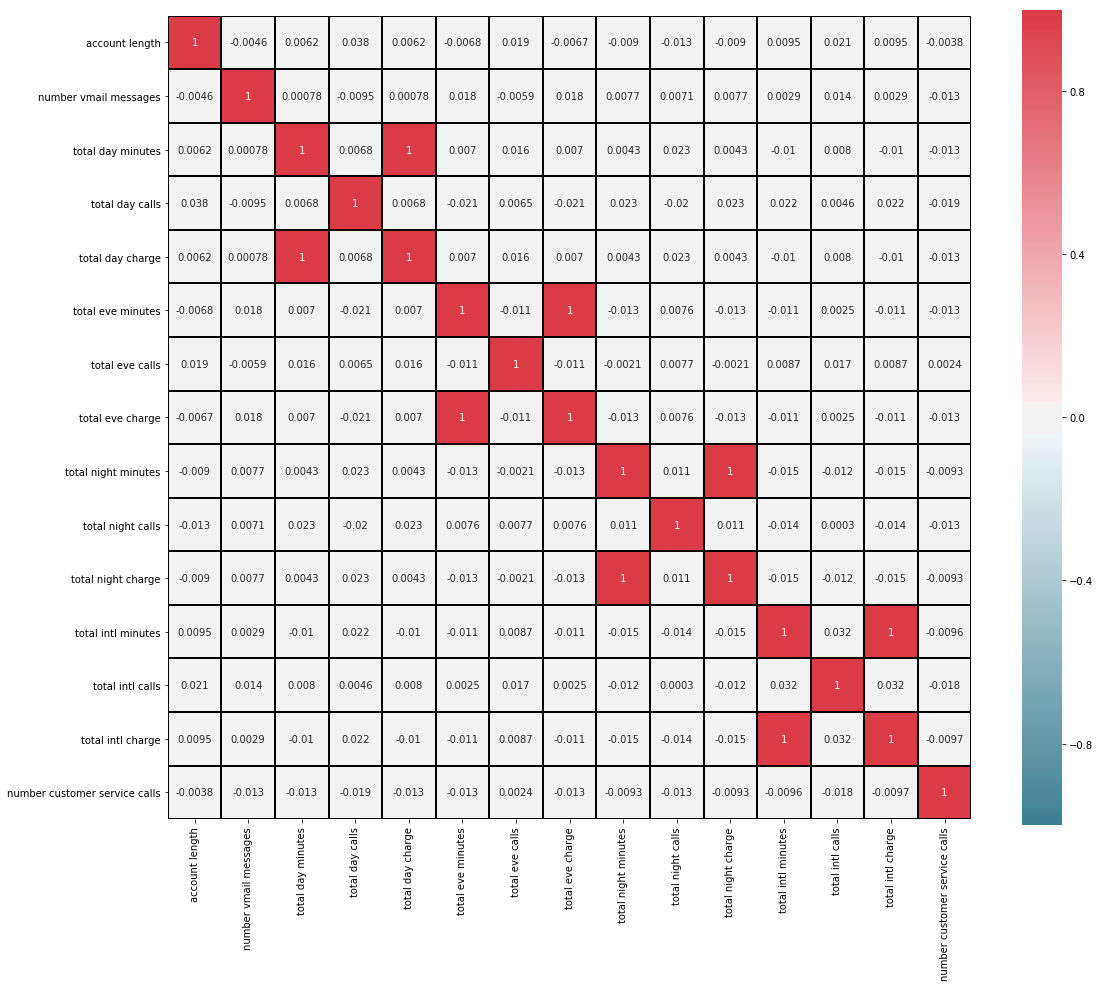

<Figure size 432x288 with 0 Axes>

In [27]:
#Lets see which variables are important to be fed to model
#Set Pane (Width and Height)
a,ax=plt.subplots(figsize=(18,15))

#Generate Correlation Chart
corr=Train[num_variable].corr()

#Plot using seaborn library

sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),\
            square=True,ax=ax,annot=True,linewidths=1,linecolor='black',vmin=-1,vmax=1)
plt.show()

#save the fig
#plt.savefig('Correlation')

# CHI-SQUARE FOR CATEGORICAL VARIABLE

In [28]:
#important library
from scipy.stats import chi2_contingency


In [29]:
for i in cat_variable:
    print(i)
    chi2,p,dof,ex=chi2_contingency(pd.crosstab(Train['Churn'],Train[i]))
    print(p)

state
0.002296221552011188
area code
0.9150556960243712
international plan
2.4931077033159556e-50
voice mail plan
5.15063965903898e-09


In [30]:
#Lets Remove Highly Correlated Varibles
remove=['state']
Train=Train.drop(remove,axis=1)
Test=Test.drop(remove,axis=1)

In [31]:
Train.head(10)


,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,118,2,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,147,1,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,117,0,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,141,1,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [32]:
#Updated Variables
numerical=['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes',
       'total eve calls',  'total night minutes',
       'total night calls', 'total intl minutes',
       'total intl calls','number customer service calls']

categorical=['area code', 'international plan', 'voice mail plan']

# Lets go for Feature Scaling

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.


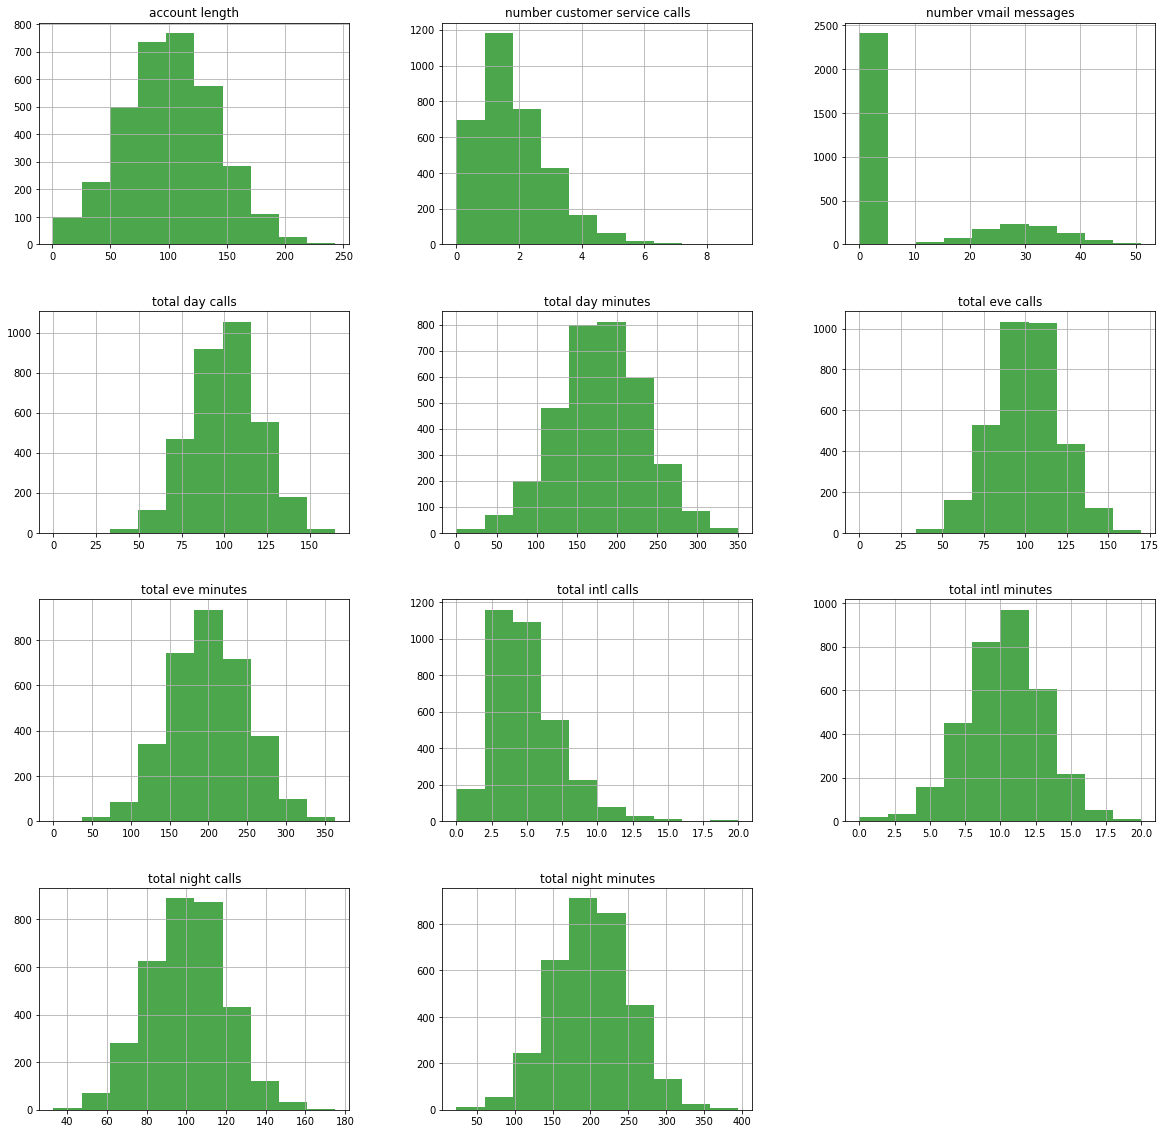

In [33]:
Train[numerical].hist(figsize=(20,20),color='g',alpha=0.7)
plt.show

Train.head(2)

# As we can see most data is uniformly distributed we will use Z score

In [34]:
#Let's Use Z-Score
for i in numerical:
        print(i)
        Train[i]=(Train[i]-Train[i].mean())/Train[i].std()
        


account length
number vmail messages
total day minutes
total day calls
total eve minutes
total eve calls
total night minutes
total night calls
total intl minutes
total intl calls
number customer service calls


In [35]:
for i in numerical:
        print(i)
        Test[i]=(Test[i]-Test[i].mean())/Test[i].std()


account length
number vmail messages
total day minutes
total day calls
total eve minutes
total eve calls
total night minutes
total night calls
total intl minutes
total intl calls
number customer service calls


In [36]:
Train.head(2)

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,0.676388,1,0,1,1.234697,1.566532,0.476572,45.07,-0.070599,-0.055932,16.78,0.866613,-0.465425,11.01,-0.084995,-0.601105,2.7,-0.427868,False.
1,0.149043,1,0,1,1.307752,-0.333688,1.124334,27.47,-0.108064,0.144845,16.62,1.058412,0.147802,11.45,1.240296,-0.601105,3.7,-0.427868,False.


In [37]:
#Lets apply

Train=Train.drop(['total day charge','total eve charge','total night charge','total intl charge'],axis=1)

In [38]:
Test=Test.drop(['total day charge','total eve charge','total night charge','total intl charge'],axis=1)

In [39]:
Test.head(5)

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,number customer service calls,Churn
0,0.059728,2,0,0,-0.534011,-2.093906,1.230541,0.237908,-1.392424,0.725042,-1.281157,0.107148,-0.550528,1.098075,False.
1,0.973416,2,0,0,-0.534011,0.801860,-0.683865,0.892858,1.968418,-2.086386,-0.895009,-0.300311,1.084626,-1.230794,False.
2,0.110488,0,0,1,1.657103,2.150183,-0.218199,0.743553,0.237075,1.999899,1.325343,1.255441,0.675838,-0.454504,False.
3,0.008968,1,0,0,-0.534011,0.672906,1.230541,-1.464165,-0.628596,0.419710,-0.846740,1.996275,-0.959317,-0.454504,False.
4,0.237390,1,0,0,-0.534011,0.305009,-1.097790,-1.511942,0.033388,0.100500,0.359972,-0.967062,-0.141740,0.321785,False.


In [40]:
#Let's convert Categorical values into Continuous Varibles
#Train["international plan"] = Train["international plan"].replace(" yes",1)
#Train["voice mail plan"] = Train["voice mail plan"].replace(" yes",1)
#Train["international plan"] = Train["international plan"].replace(" no",0)
#Train["voice mail plan"] = Train["voice mail plan"].replace(" no",0)
Train["Churn"] = Train["Churn"].replace(" False.",0)
Train["Churn"] = Train["Churn"].replace(" True.",1)
Test["Churn"] = Test["Churn"].replace(" False.",0)
Test["Churn"] = Test["Churn"].replace(" True.",1)


# Sampling for feeding our data to Model

In [ ]:
#Lets divide our data into TRAIN AND TEST

X_Train=Train.iloc[:,0:14]
Y_Train=Train.iloc[:,14]
X_Test=Test.iloc[:,0:14]
Y_Test=Test.iloc[:,14]


X contains all Independent Variables,Y contains Dependent Variable

# Now we will use SMOTE to nullify Over-Sampling

In [48]:
#Load Library
from imblearn.over_sampling import SMOTE

In [49]:
#Smote=SMOTE(random_state=101)
X_Train_Sm,Y_Train_Sm=SMOTE().fit_sample(X_Train,Y_Train)

In [50]:
#Lets check the shape now
#Y_Train_Sm.shape

#Train['Churn']=Train['Churn'].astype('category')
Train

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,number customer service calls,Churn
0,0.676388,1,0,1,1.234697,1.566532,0.476572,-0.070599,-0.055932,0.866613,-0.465425,-0.084995,-0.601105,-0.427868,0
1,0.149043,1,0,1,1.307752,-0.333688,1.124334,-0.108064,0.144845,1.058412,0.147802,1.240296,-0.601105,-0.427868,0
2,0.902393,1,0,0,-0.591671,1.168128,0.675883,-1.573147,0.496204,-0.756756,0.198905,0.703015,0.211502,-1.188040,0
3,-0.428526,0,1,0,-0.591671,2.196267,-1.466716,-2.742453,-0.608068,-0.078539,-0.567629,-1.302831,1.024109,0.332305,0
4,-0.654531,1,1,0,-0.591671,-0.240054,0.626055,-1.038776,1.098534,-0.276270,1.067643,-0.049177,-0.601105,1.092477,0
5,0.425271,2,1,0,-0.591671,0.800936,-0.121363,0.386870,0.044456,0.059872,0.914336,-1.410287,0.617806,-1.188040,0
6,0.500606,2,0,1,1.161643,0.705466,-0.619642,2.908864,0.395816,0.231898,0.914336,-0.980462,1.024109,1.092477,0
7,1.153510,1,1,0,-0.591671,-0.418142,-1.068093,-1.930052,-0.306903,0.216079,-0.209913,-1.123737,0.617806,-1.188040,0
8,0.400159,0,0,0,-0.591671,0.086747,-0.171191,2.969991,-1.009622,0.295172,-0.516527,-0.550638,-0.194801,-0.427868,0
9,1.002840,1,1,1,2.111354,1.447194,-0.818953,0.414476,0.546398,2.482073,-0.158811,0.344829,0.211502,-1.188040,0


In [166]:
#Test['Churn']=Test['Churn'].astype('category')


# Lets Build Random Forest Model

In [68]:
rf_model=RandomForestClassifier(n_estimators=500,random_state=101).fit(X_Train,Y_Train)


In [69]:
#Lets apply model on Test Data by Ignoring Target Variable
Predictions_rf=rf_model.predict(X_Test)

In [54]:
#Lets apply model on Test Data by Ignoring Target Variable
#Lets build a fucntion for calculation of Confusion Matrix
def CONFUSION_MATRIX(model,test):
    cm=pd.crosstab(model,test)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print()
    print()
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('Specificity //  True Negative Rate :- ',round((TN*100)/(TN+FP),2))
    print()
    print('Sensivity // True Positive Rate // Recall :- ',round((TP*100)/(FN+TP),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))


In [71]:
CONFUSION_MATRIX(Y_Test,Predictions_rf)



Accuracy :-  95.74

Specificity //  True Negative Rate :-  99.51

Sensivity // True Positive Rate // Recall :-  71.43

False Negative Rate :-  28.57


# Lets Build Logistic Regression Model


In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:

Logistic_Model=LogisticRegression(random_state=101).fit(X_Train,Y_Train)
Logistic_Model

C:\Users\akshay.hirpara\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=101, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [74]:
Predictions_LM=Logistic_Model.predict(X_Test)

In [75]:
Predictions_LM

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
CONFUSION_MATRIX(Y_Test,Predictions_LM)



Accuracy :-  87.1

Specificity //  True Negative Rate :-  97.64

Sensivity // True Positive Rate // Recall :-  19.2

False Negative Rate :-  80.8


# Lets build Naive Bayes 

In [77]:
#Lets Load Library

from sklearn.naive_bayes import GaussianNB


In [78]:
NaiveBayes=GaussianNB().fit(X_Train,Y_Train)

In [79]:
NaiveBayes

GaussianNB(priors=None, var_smoothing=1e-09)

In [80]:
Predictions_NB=NaiveBayes.predict(X_Test)
Predictions_NB

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
CONFUSION_MATRIX(Y_Test,Predictions_NB)



Accuracy :-  86.02

Specificity //  True Negative Rate :-  93.07

Sensivity // True Positive Rate // Recall :-  40.62

False Negative Rate :-  59.38


# KNN Model

In [82]:
#Lets Load Library
from sklearn.neighbors import KNeighborsClassifier

In [83]:
KNN_Model=KNeighborsClassifier(n_neighbors=3).fit(X_Train,Y_Train)

In [2]:
#Lets Predict Test Cases
Predictions_KNN=KNN_Model.predict(X_Test)

NameError: name 'KNN_Model' is not defined

In [85]:
CONFUSION_MATRIX(Predictions_KNN,Y_Test)



Accuracy :-  89.08

Specificity //  True Negative Rate :-  89.83

Sensivity // True Positive Rate // Recall :-  75.0

False Negative Rate :-  25.0


# Lets Build a Model With SMOTE, Applying SMOTE on Random Forest

In [63]:
rf_model01=RandomForestClassifier(n_estimators=500,random_state=101).fit(X_Train_Sm,Y_Train_Sm)


#Lets apply model on Test Data by Ignoring Target Variable
Predictions_rf01=rf_model01.predict(X_Test)

In [64]:
CONFUSION_MATRIX(Predictions_rf01,Y_Test)



Accuracy :-  93.46

Specificity //  True Negative Rate :-  96.97

Sensivity // True Positive Rate // Recall :-  73.28

False Negative Rate :-  26.72


In [97]:
#Lets see ROC and AUC curve

fpr,tpr,thresholds=roc_curve(Y_Test,Predictions_rf01)

In [98]:
#Now calculate AUC
auc=roc_auc_score(Y_Test,Predictions_rf01)

ROC AUC: 0.88


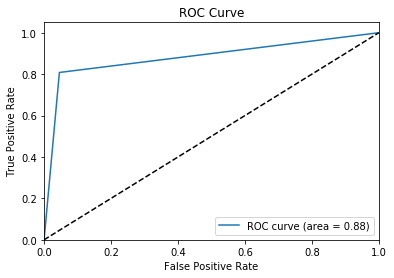

In [103]:
print ('ROC AUC: %0.2f' % auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()